<a href="https://colab.research.google.com/github/hongkwangpyo/2020_deep_learning/blob/master/0812_A_function_api_multi_io.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(2020)

# 햄버거 이미지
hamburger_img = np.random.random((1000, 28, 28, 1))
# 햄버거에 대한 평가
customer_form = np.random.randint(10000, size = (1000, 100))

# 햄버거에 대한 평점
hamburger_rate = np.round(np.random.random((1000,)) * 5, 1)
# 햄버거에 보완되어질 50가지의 재료
update_for_hamburger = np.random.randint(50, size = (1000,))

print(hamburger_img.shape, customer_form.shape)
print(hamburger_rate.shape, update_for_hamburger.shape)

(1000, 28, 28, 1) (1000, 100)
(1000,) (1000,)


## 다중 입출력 모델 구성하기

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Dense, Concatenate

# 각 입력에 대한 형태를 명시합니다. 
img_input = Input(shape = (28, 28, 1), name = 'hamburger_img')
form_input = Input(shape = (None, ), name = 'customer_form')

# 햄버거 이미지 입력
x_1 = Conv2D(32, (3, 3), activation = 'relu')(img_input)
x_1 = Conv2D(32, (3, 3), activation = 'relu')(x_1)
x_1 = MaxPooling2D(strides = 2)(x_1)
x_1 = GlobalAveragePooling2D()(x_1)

# 햄버거에 대한 평가 입력
x_2 = Embedding(10000, 64)(form_input)
x_2 = LSTM(128)(x_2)

# 출력을 만들기 위해 모든 입력을 하나의 텐서로 합칩니다. 
x = Concatenate()([x_1, x_2])

# 햄버거 평점에 대한 출력값
rate_pred = Dense(1, name = 'hamburger_rate')(x)
# 보완될 50가지 재료에 대한 출력값
update_pred = Dense(50, activation = 'softmax', name = 'update_for_hamburger')(x)

# 모델을 생성합니다.
model = Model(inputs = [img_input, form_input],
             outputs = [rate_pred, update_pred])

## 모델 구조 그려보기

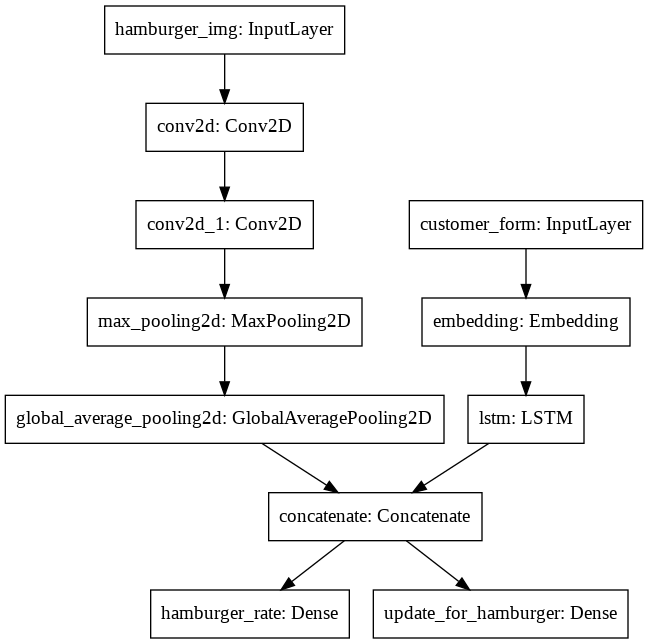

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

## 모델 구조 확인하기

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
hamburger_img (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 32)   320         hamburger_img[0][0]              
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 24, 24, 32)   9248        conv2d[0][0]                     
__________________________________________________________________________________________________
customer_form (InputLayer)      [(None, None)]       0                                            
_______________________________________________________________________________________

## 다중 입출력 모델에서 학습 과정 설정하기

In [ ]:
# 손실함수에 리스트 형태를 사용한 경우
# model.compile(optimizer = 'adam', 
#              loss = ['mse', 'sparse_categorical_crossentropy'], # 리스트
#              metrics = {'hamburger_rate':'mse', 'update_for_hamburger':'acc'})

# 또는

# 손실함수에 딕셔너리 형태를 사용한 경우
model.compile(optimizer = 'adam', 
             loss = {'hamburger_rate':'mse', 
                      'update_for_hamburger':'sparse_categorical_crossentropy'}, # 딕셔너리
             metrics = {'hamburger_rate':'mse', 'update_for_hamburger':'acc'})

## 다중 입출력 모델 학습시키기

In [ ]:
# 모델 학습에 리스트 형태를 사용한 경우
# model.fit([hamburger_img, customer_form], 
#           [hamburger_rate, update_for_hamburger],
#          epochs = 2, batch_size = 32)

# 또는

# 모델 학습에 딕셔너리 형태를 사용한 경우
model.fit({'hamburger_img':hamburger_img, 'customer_form':customer_form}, 
          {'hamburger_rate':hamburger_rate, 'update_for_hamburger':update_for_hamburger},
         epochs = 2, batch_size = 32)

Epoch 1/2
32/32 [==============================] - 5s 158ms/step - loss: 7.6141 - hamburger_rate_loss: 3.6772 - update_for_hamburger_loss: 3.9368 - hamburger_rate_mse: 3.6772 - update_for_hamburger_acc: 0.0200
Epoch 2/2
32/32 [==============================] - 5s 154ms/step - loss: 6.0182 - hamburger_rate_loss: 2.1079 - update_for_hamburger_loss: 3.9103 - hamburger_rate_mse: 2.1079 - update_for_hamburger_acc: 0.0270
